<a href="https://colab.research.google.com/github/IbniAkbar/Analisis-Penggunaan-Hak-Pilih-Pemilu-2024/blob/main/DataScience(gorontalo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv("Gorontalo.csv")
df

,id_provinsi,nama_provinsi,id_kota,nama_kota,id_kecamatan,nama_kecamatan,id_kelurahan,nama_kelurahan,id_tps,nama_tps,paslon_satu,paslon_dua,paslon_tiga,jumlah_pengguna_hak_pilih,jumlah_suara_sah,jumlah_suara_tidak_sah,jumlah_total,gambar_hasil_1,gambar_hasil_2,gambar_hasil_3
0,75,Gorontalo,7502,BOALEMO,750206,BOTUMOITO,7502062007,BOLIHUTUO,7502062007001,TPS 001,47.0,183.0,7.0,241.0,237.0,4.0,241.0,https://sirekap-obj-formc.kpu.go.id/2243/pemil...,https://sirekap-obj-formc.kpu.go.id/2243/pemil...,https://sirekap-obj-formc.kpu.go.id/2243/pemil...
1,75,Gorontalo,7502,BOALEMO,750206,BOTUMOITO,7502062007,BOLIHUTUO,7502062007002,TPS 002,58.0,179.0,12.0,251.0,249.0,2.0,251.0,https://sirekap-obj-formc.kpu.go.id/ab01/pemil...,https://sirekap-obj-formc.kpu.go.id/ab01/pemil...,https://sirekap-obj-formc.kpu.go.id/ab01/pemil...
2,75,Gorontalo,7502,BOALEMO,750206,BOTUMOITO,7502062007,BOLIHUTUO,7502062007003,TPS 003,48.0,194.0,25.0,273.0,267.0,6.0,273.0,https://sirekap-obj-formc.kpu.go.id/6791/pemil...,https://sirekap-obj-formc.kpu.go.id/6791/pemil...,https://sirekap-obj-formc.kpu.go.id/6791/pemil...
3,75,Gorontalo,7502,BOALEMO,750206,BOTUMOITO,7502062007,BOLIHUTUO,7502062007004,TPS 004,NaN,NaN,NaN,250.0,244.0,6.0,250.0,https://sirekap-obj-formc.kpu.go.id/39d2/pemil...,https://sirekap-obj-formc.kpu.go.id/39d2/pemil...,https://sirekap-obj-formc.kpu.go.id/39d2/pemil...
4,75,Gorontalo,7502,BOALEMO,750206,BOTUMOITO,7502062006,BOTUMOITO,7502062006001,TPS 001,46.0,173.0,7.0,236.0,226.0,10.0,236.0,https://sirekap-obj-formc.kpu.go.id/9df3/pemil...,https://sirekap-obj-formc.kpu.go.id/9df3/pemil...,https://sirekap-obj-formc.kpu.go.id/9df3/pemil...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,75,Gorontalo,7504,POHUWATO,750411,WANGGARASI,7504112001,WONGGARASI TIMUR,7504112001003,TPS 003,79.0,115.0,7.0,205.0,201.0,4.0,205.0,https://sirekap-obj-formc.kpu.go.id/de72/pemil...,https://sirekap-obj-formc.kpu.go.id/de72/pemil...,https://sirekap-obj-formc.kpu.go.id/de72/pemil...
3535,75,Gorontalo,7504,POHUWATO,750411,WANGGARASI,7504112001,WONGGARASI TIMUR,7504112001004,TPS 004,54.0,131.0,5.0,195.0,190.0,5.0,195.0,https://sirekap-obj-formc.kpu.go.id/5ed4/pemil...,https://sirekap-obj-formc.kpu.go.id/5ed4/pemil...,https://sirekap-obj-formc.kpu.go.id/5ed4/pemil...
3536,75,Gorontalo,7504,POHUWATO,750411,WANGGARASI,7504112006,YIPILO,7504112006001,TPS 001,105.0,129.0,14.0,251.0,248.0,3.0,251.0,https://sirekap-obj-formc.kpu.go.id/46f4/pemil...,https://sirekap-obj-formc.kpu.go.id/46f4/pemil...,https://sirekap-obj-formc.kpu.go.id/46f4/pemil...
3537,75,Gorontalo,7504,POHUWATO,750411,WANGGARASI,7504112006,YIPILO,7504112006002,TPS 002,98.0,84.0,6.0,188.0,188.0,0.0,188.0,https://sirekap-obj-formc.kpu.go.id/5187/pemil...,https://sirekap-obj-formc.kpu.go.id/5187/pemil...,https://sirekap-obj-formc.kpu.go.id/5187/pemil...


In [ ]:
df = df.drop(['id_provinsi', 'nama_provinsi', 'paslon_satu', 'paslon_dua', 'paslon_tiga', 'id_tps', 'nama_tps', 'gambar_hasil_1', 'id_kota', 'nama_kota', 'id_kecamatan', 'id_kelurahan', 'nama_kelurahan', 'gambar_hasil_2', 'gambar_hasil_3' ], axis=1)
df

,nama_kecamatan,jumlah_pengguna_hak_pilih,jumlah_suara_sah,jumlah_suara_tidak_sah,jumlah_total
0,BOTUMOITO,241.0,237.0,4.0,241.0
1,BOTUMOITO,251.0,249.0,2.0,251.0
2,BOTUMOITO,273.0,267.0,6.0,273.0
3,BOTUMOITO,250.0,244.0,6.0,250.0
4,BOTUMOITO,236.0,226.0,10.0,236.0
...,...,...,...,...,...
3534,WANGGARASI,205.0,201.0,4.0,205.0
3535,WANGGARASI,195.0,190.0,5.0,195.0
3536,WANGGARASI,251.0,248.0,3.0,251.0
3537,WANGGARASI,188.0,188.0,0.0,188.0


In [ ]:
df.shape

(3539, 5)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (563, 5)


In [ ]:
df = df.drop_duplicates()
df

,nama_kecamatan,jumlah_pengguna_hak_pilih,jumlah_suara_sah,jumlah_suara_tidak_sah,jumlah_total
0,BOTUMOITO,241.0,237.0,4.0,241.0
1,BOTUMOITO,251.0,249.0,2.0,251.0
2,BOTUMOITO,273.0,267.0,6.0,273.0
3,BOTUMOITO,250.0,244.0,6.0,250.0
4,BOTUMOITO,236.0,226.0,10.0,236.0
...,...,...,...,...,...
3534,WANGGARASI,205.0,201.0,4.0,205.0
3535,WANGGARASI,195.0,190.0,5.0,195.0
3536,WANGGARASI,251.0,248.0,3.0,251.0
3537,WANGGARASI,188.0,188.0,0.0,188.0


In [ ]:
df.shape

(2976, 5)

In [ ]:
print(df.isnull().sum())

nama_kecamatan                0
jumlah_pengguna_hak_pilih    62
jumlah_suara_sah             62
jumlah_suara_tidak_sah       62
jumlah_total                 62
dtype: int64


In [ ]:
df.dropna(inplace = True)

<ipython-input-9-d1ada024d2eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [ ]:
print(df.isnull().sum())

nama_kecamatan               0
jumlah_pengguna_hak_pilih    0
jumlah_suara_sah             0
jumlah_suara_tidak_sah       0
jumlah_total                 0
dtype: int64


In [ ]:
df.count()


nama_kecamatan               2914
jumlah_pengguna_hak_pilih    2914
jumlah_suara_sah             2914
jumlah_suara_tidak_sah       2914
jumlah_total                 2914
dtype: int64

In [ ]:
df

,nama_kecamatan,jumlah_pengguna_hak_pilih,jumlah_suara_sah,jumlah_suara_tidak_sah,jumlah_total
0,BOTUMOITO,241.0,237.0,4.0,241.0
1,BOTUMOITO,251.0,249.0,2.0,251.0
2,BOTUMOITO,273.0,267.0,6.0,273.0
3,BOTUMOITO,250.0,244.0,6.0,250.0
4,BOTUMOITO,236.0,226.0,10.0,236.0
...,...,...,...,...,...
3534,WANGGARASI,205.0,201.0,4.0,205.0
3535,WANGGARASI,195.0,190.0,5.0,195.0
3536,WANGGARASI,251.0,248.0,3.0,251.0
3537,WANGGARASI,188.0,188.0,0.0,188.0


In [ ]:
ClassKecamatan = df.groupby('nama_kecamatan')[['jumlah_pengguna_hak_pilih', 'jumlah_suara_sah', 'jumlah_suara_tidak_sah', 'jumlah_total']].sum()

In [ ]:
ClassKecamatan

,jumlah_pengguna_hak_pilih,jumlah_suara_sah,jumlah_suara_tidak_sah,jumlah_total
nama_kecamatan,,,,
ANGGREK,10098.0,10286.0,156.0,10442.0
ASPARAGA,8148.0,8049.0,95.0,8145.0
ATINGGOLA,7932.0,7766.0,67.0,7833.0
BATUDAA,8600.0,8939.0,119.0,9058.0
BATUDAA PANTAI,8214.0,8113.0,101.0,8214.0
...,...,...,...,...
TOLANGOHULA,12995.0,12394.0,159.0,12553.0
TOLINGGULA,6502.0,6440.0,62.0,6502.0
TOMILITO,6280.0,6133.0,147.0,6280.0


In [ ]:
findN=[]
for i in range(1,20):
    score=KMeans(n_clusters=i, n_init=10).fit(ClassKecamatan).score(ClassKecamatan)
    print(score)
    findN.append(score)

-5015932795.220778
-1706388614.9642854
-851337675.0718391
-537490779.713793
-308733162.6894737
-217492493.52073276
-157380290.23333335
-113954022.37495959
-87406337.83628723
-68882460.26915586
-51414559.85562771
-41667046.95739539
-32417977.64722222
-25711832.63787879
-21138451.81010101
-18185299.682323232
-16546650.49404762
-13912760.86468254
-11875320.660714287


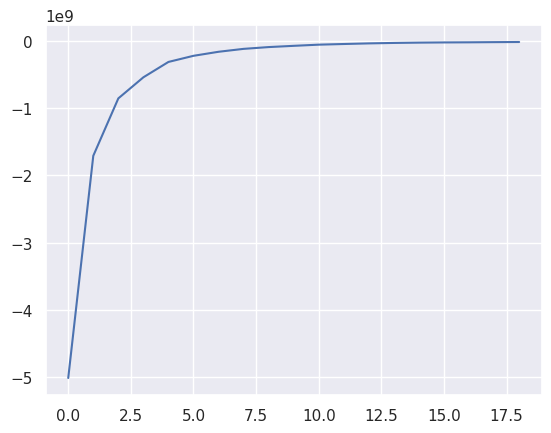

In [ ]:
plt.plot(findN)

In [ ]:
kmeans = KMeans(n_clusters=5wik, random_state=30)
kmeans.fit(ClassKecamatan)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=30)

In [ ]:
ClassKecamatan['cluster'] = kmeans.labels_

In [ ]:
kmeans.labels_

array([2, 1, 1, 2, 1, 3, 1, 3, 1, 3, 3, 1, 0, 1, 3, 1, 3, 3, 3, 3, 3, 3,
       1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 2, 2, 0, 2, 0, 3, 4, 0, 3, 2, 3, 2,
       2, 4, 3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 1, 3, 1, 3, 3, 3, 2, 1, 1, 3,
       2, 2, 0, 0, 2, 2, 2, 1, 1, 3, 0], dtype=int32)

In [ ]:
ClassKecamatan

,jumlah_pengguna_hak_pilih,jumlah_suara_sah,jumlah_suara_tidak_sah,jumlah_total,cluster
nama_kecamatan,,,,,
ANGGREK,10098.0,10286.0,156.0,10442.0,2
ASPARAGA,8148.0,8049.0,95.0,8145.0,1
ATINGGOLA,7932.0,7766.0,67.0,7833.0,1
BATUDAA,8600.0,8939.0,119.0,9058.0,2
BATUDAA PANTAI,8214.0,8113.0,101.0,8214.0,1
...,...,...,...,...,...
TOLANGOHULA,12995.0,12394.0,159.0,12553.0,2
TOLINGGULA,6502.0,6440.0,62.0,6502.0,1
TOMILITO,6280.0,6133.0,147.0,6280.0,1


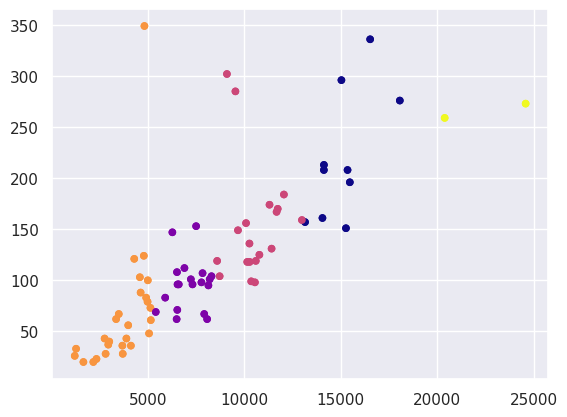

In [ ]:
x_ = ClassKecamatan['jumlah_pengguna_hak_pilih']
y_ = ClassKecamatan['jumlah_suara_tidak_sah']
z_ = ClassKecamatan['jumlah_suara_tidak_sah']
label = ClassKecamatan['cluster']

plt.scatter(x_, y_, s=20, c=label, cmap='plasma')

plt.scatter(x_, z_, s=20, c=label, cmap='plasma')
plt.show()

In [ ]:
x = ClassKecamatan[['jumlah_pengguna_hak_pilih', 'jumlah_suara_tidak_sah']]

In [ ]:
sse=[]
index = range(1,10)
for i in index:
  kmeans = KMeans(n_clusters=i,n_init=10, random_state=30)
  kmeans.fit(x)
  sse_ = kmeans.inertia_
  sse.append(sse_)
  print(i,sse_)

1 1660691201.6103897
2 560235658.9591835
3 276002724.21371734
4 173175186.57586205
5 97136807.45097402
6 66287105.87306772
7 48945327.368833065
8 37859440.230769224
9 27560878.43499278


In [ ]:
from google.colab import files

ClassKecamatan.to_csv('Hasil.csv')